### Install Required Libraries:



In [1]:
!pip install pandas matplotlib seaborn

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


Import Libraries:
Import pandas for data manipulation and analysis, and matplotlib/seaborn for visualization:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
import folium
from geopy.geocoders import Nominatim

### Read the Dataset:

Load the sample dataset into a pandas DataFrame. 
Replace the actual path or URL if needed:

In [4]:
PATH = "./Data/Registered_Business_Locations_-_San_Francisco_20240120.csv"

In [5]:
df = pd.read_csv(PATH)
df.shape

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (14,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(318507, 32)

## Explore the Dataset:
Get an overview of the dataset using various pandas functions:

In [6]:
#prevent dataframe truncation by adjusting pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
df.columns

Index(['Location Id', 'Business Account Number', 'Ownership Name', 'DBA Name',
       'Street Address', 'City', 'State', 'Source Zipcode',
       'Business Start Date', 'Business End Date', 'Location Start Date',
       'Location End Date', 'Mail Address', 'Mail City', 'Mail Zipcode',
       'Mail State', 'NAICS Code', 'NAICS Code Description', 'Parking Tax',
       'Transient Occupancy Tax', 'LIC Code', 'LIC Code Description',
       'Supervisor District', 'Neighborhoods - Analysis Boundaries',
       'Business Corridor', 'Business Location', 'UniqueID',
       'SF Find Neighborhoods', 'Current Police Districts',
       'Current Supervisor Districts', 'Analysis Neighborhoods',
       'Neighborhoods'],
      dtype='object')

In [8]:
# Display the first few rows of the dataset
df.head()



,Location Id,Business Account Number,Ownership Name,DBA Name,Street Address,City,State,Source Zipcode,Business Start Date,Business End Date,Location Start Date,Location End Date,Mail Address,Mail City,Mail Zipcode,Mail State,NAICS Code,NAICS Code Description,Parking Tax,Transient Occupancy Tax,LIC Code,LIC Code Description,Supervisor District,Neighborhoods - Analysis Boundaries,Business Corridor,Business Location,UniqueID,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Neighborhoods
0,0022280-08-001,22280,Yee Shubert Y,Hang On Investments,751 Clay St,San Francisco,CA,94108,10/01/1968,06/29/2018,08/01/2009,05/31/2014,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,3.0,Chinatown,NaN,POINT (-122.40577 37.794304),0022280-08-001-0022280--08-01-2009,104.0,6.0,3.0,6.0,104.0
1,0025394-02-001,25394,Sedgwick Llp,Sedgwick Llp,333 Bush St 30th Fl,San Francisco,CA,94104,10/01/1968,03/30/2018,09/06/2011,03/30/2018,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,3.0,Financial District/South Beach,NaN,POINT (-122.40321 37.790836),0025394-02-001-0025394--09-06-2011,19.0,6.0,3.0,8.0,19.0
2,0035158-08-001,35158,Digenova A,65 Fresno St Apts,65 Fresno St,San Francisco,CA,94133,01/16/1973,06/30/2017,02/01/2006,06/30/2017,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,3.0,North Beach,NaN,POINT (-122.40664 37.798527),0035158-08-001-0035158--02-01-2006,106.0,6.0,3.0,23.0,106.0
3,0049323-05-001,49323,Iron Mountain Inform Mgt Inc,Iron Mountain Info Mgmt Inc,50 Crisp Rd,San Francisco,CA,94124,01/15/1998,11/13/2017,01/01/2004,11/13/2017,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,10.0,Bayview Hunters Point,NaN,POINT (-122.37979 37.727787),0049323-05-001-0049323--01-01-2004,78.0,2.0,9.0,1.0,78.0
4,1155567-07-171,1073842,Macrae Inc,"Mlegal Consulting, Inc.",Embarcadero Center 1130,San Francisco,CA,94111,06/01/2017,NaN,06/01/2017,05/01/2021,437 Kipling St Ste 200,Palo Alto,94301,CA,5400-5499,"Professional, Scientific, and Technical Services",False,False,NaN,NaN,3.0,Financial District/South Beach,NaN,POINT (-122.39798 37.794853),1155567-07-171-1073842-5400-5499-06-01-2017,108.0,6.0,3.0,8.0,108.0


In [9]:
df.dtypes

Location Id                             object
Business Account Number                  int64
Ownership Name                          object
DBA Name                                object
Street Address                          object
City                                    object
State                                   object
Source Zipcode                          object
Business Start Date                     object
Business End Date                       object
Location Start Date                     object
Location End Date                       object
Mail Address                            object
Mail City                               object
Mail Zipcode                            object
Mail State                              object
NAICS Code                              object
NAICS Code Description                  object
Parking Tax                               bool
Transient Occupancy Tax                   bool
LIC Code                                object
LIC Code Desc

In [10]:
# Check for missing values
print(df.isnull().sum())

Location Id                                 0
Business Account Number                     0
Ownership Name                              0
DBA Name                                    0
Street Address                              5
City                                      197
State                                     642
Source Zipcode                            220
Business Start Date                         0
Business End Date                      155267
Location Start Date                         0
Location End Date                      121746
Mail Address                           124101
Mail City                              163263
Mail Zipcode                           163271
Mail State                             163323
NAICS Code                             147274
NAICS Code Description                 147253
Parking Tax                                 0
Transient Occupancy Tax                     0
LIC Code                               304056
LIC Code Description              

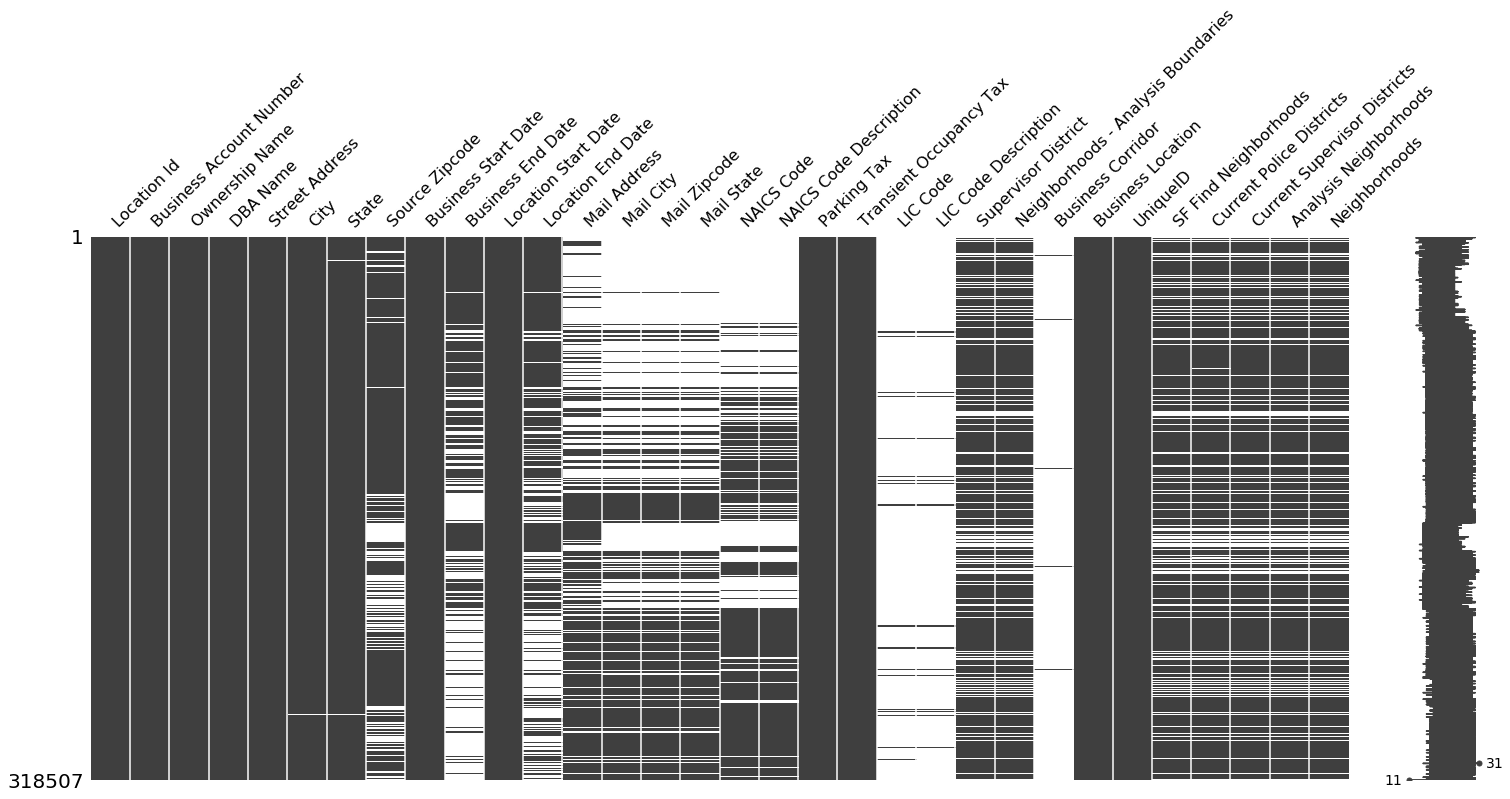

In [18]:
# Visualize missing values patterns:
msno.matrix(df)

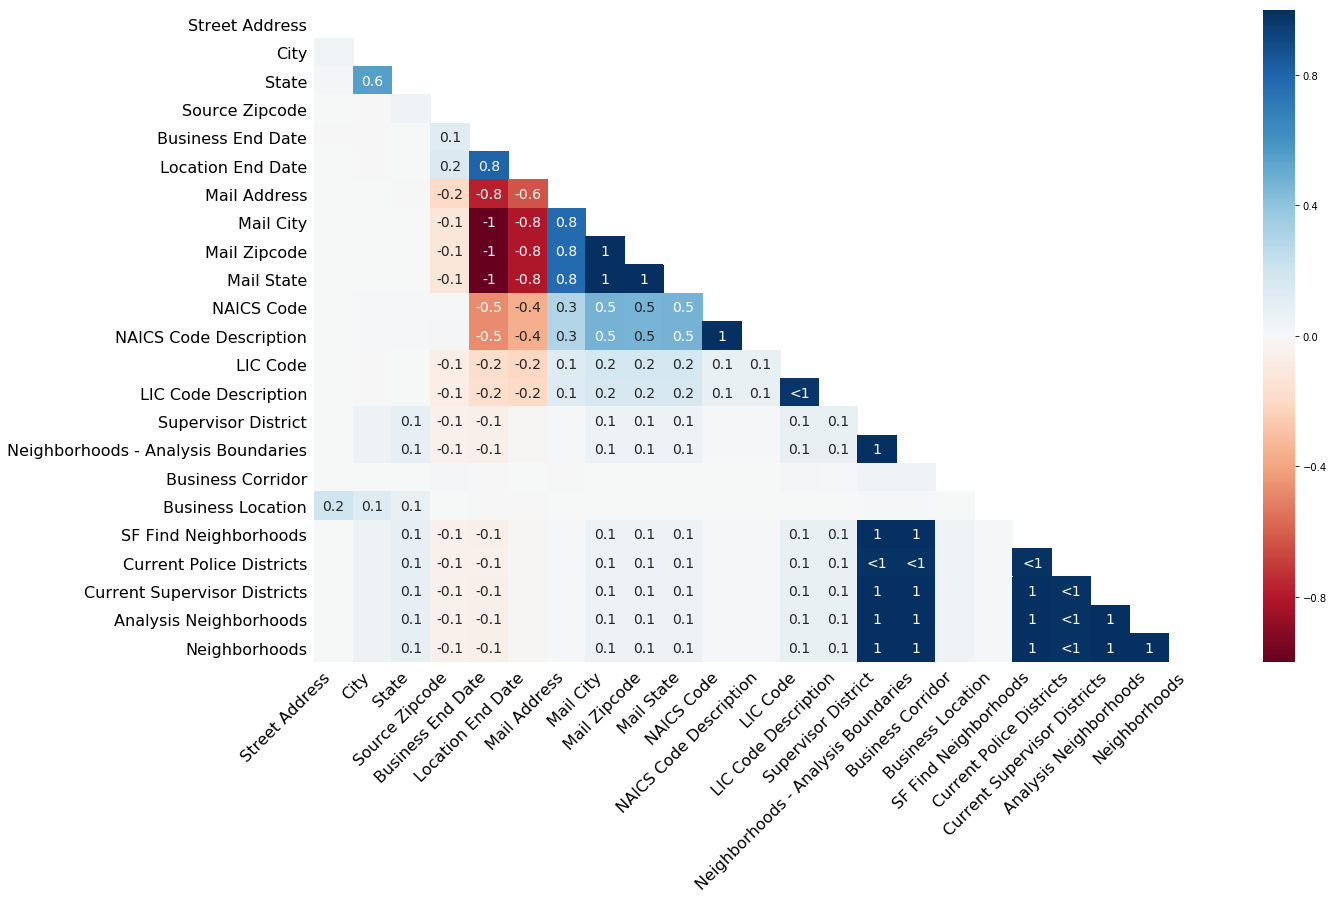

In [19]:
# Visualize the correlation between the missing of one variable and another:
msno.heatmap(df)

## Data Cleaning

In [6]:
# First, drop columns with no valid values:

df = df.dropna(how = 'all', axis = 1)
df.shape

(318507, 32)

In [7]:
#Drop any duplicate rows (just in case…):

df = df.drop_duplicates()
df.shape


(318507, 32)

In [8]:
# Drop any attribute that have a high number of missing values (More than 300K registers missing):

df = df[['Location Id', 'Business Account Number', 'Ownership Name', 'DBA Name',
       'Street Address', 'City', 'State', 'Source Zipcode',
       'Business Start Date', 'Business End Date', 'Location Start Date',
       'Location End Date', 'Mail Address', 'Mail City', 'Mail Zipcode',
       'Mail State', 'NAICS Code', 'NAICS Code Description', 'Parking Tax',
       'Transient Occupancy Tax', 'Supervisor District', 'Neighborhoods - Analysis Boundaries',
       'Business Location', 'UniqueID',
       'SF Find Neighborhoods', 'Current Police Districts',
       'Current Supervisor Districts', 'Analysis Neighborhoods',
       'Neighborhoods']]
df.shape

(318507, 29)

In [9]:
# Drop rows with missing values
df_cleaned = df.dropna()
df.shape

(318507, 29)

## Data Formatting


### Fix Data Format

In [10]:
# convert a set of columns to numeric form:

# Specify the columns to convert to numeric
columns_to_convert = ['Source Zipcode', 'Mail Zipcode', 'Supervisor District']

# Convert specified columns to numeric
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')


In [11]:
# convert a set of columns to numeric form:
# Specify the columns to convert to numeric
columns_to_convert = ['Source Zipcode', 'Mail Zipcode', 'Supervisor District']

# Convert specified columns to numeric
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [12]:
# Specify the columns to convert to datetime
columns_to_datetime = ['Business Start Date', 'Business End Date', 'Location Start Date', 'Location End Date']

# Convert specified columns to datetime
df[columns_to_datetime] = df[columns_to_datetime].apply(pd.to_datetime, errors='coerce')

In [13]:
# Specify the columns to convert to datetime
columns_to_convert = ['Business Start Date', 'Business End Date', 'Location Start Date', 'Location End Date']

# Convert specified columns to datetime
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_datetime, errors='coerce')

## Data Analysis
visualize the distribution of the numerical columns:

In [13]:
# Get summary statistics for numeric features
df.describe()

,Business Account Number,Source Zipcode,Mail Zipcode,Supervisor District,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Neighborhoods
count,3.185070e+05,242427.00000,154976.000000,259748.000000,259760.000000,258499.000000,259763.000000,259746.000000,259760.000000
mean,7.374421e+05,92687.76324,88920.023023,5.568158,57.467408,5.258461,6.249747,18.874859,57.467408
std,3.592018e+05,11127.02649,18674.302854,2.892412,35.090341,2.871349,3.203374,12.207240,35.090341
min,2.400000e+01,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.211920e+05,94105.00000,94104.000000,3.000000,31.000000,3.000000,3.000000,8.000000,31.000000
50%,9.397780e+05,94112.00000,94114.000000,6.000000,53.000000,6.000000,6.000000,20.000000,53.000000
75%,1.083050e+06,94124.00000,94131.000000,8.000000,95.000000,8.000000,10.000000,30.000000,95.000000
max,1.154001e+06,949901.00000,99999.000000,11.000000,117.000000,10.000000,11.000000,41.000000,117.000000


In [14]:
# Get summary statistics for non numeric attributes:
df.describe(include='object')

,Location Id,Ownership Name,DBA Name,Street Address,City,State,Mail Address,Mail City,Mail State,NAICS Code,NAICS Code Description,Neighborhoods - Analysis Boundaries,Business Location,UniqueID
count,318507,318507,318507,318502,318310,317865,194406,155244,155184,171233,171254,259746,318502,318507
unique,318507,216461,259816,219194,2891,61,77409,2147,67,808,18,41,129644,318507
top,0400777-01-001,Side Inc,Breather,580 4th St,San Francisco,CA,***Administratively Closed,San Francisco,CA,5400-5499,"Professional, Scientific, and Technical Services",Financial District/South Beach,POINT (-122.39708 37.778454),1007237-09-141-0488351--06-30-2014
freq,1,1629,610,1402,257877,309228,39140,103560,138736,28319,28300,40906,1410,1


### Visualize the dataset
Get simple visualizations and tabulations of the data present in the SF business dataset:


In [15]:
# Get the list of numeric columns
#numeric_columns = df.select_dtypes(include=['number']).columns

numeric_columns = ['Business Account Number', 'Current Police Districts',
       'Current Supervisor Districts', 'Analysis Neighborhoods',
       'Neighborhoods']

column:  Business Account Number


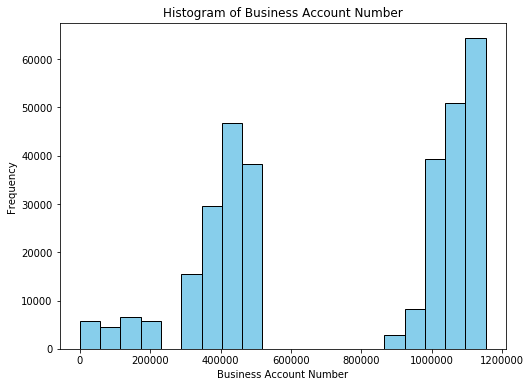

column:  Current Police Districts


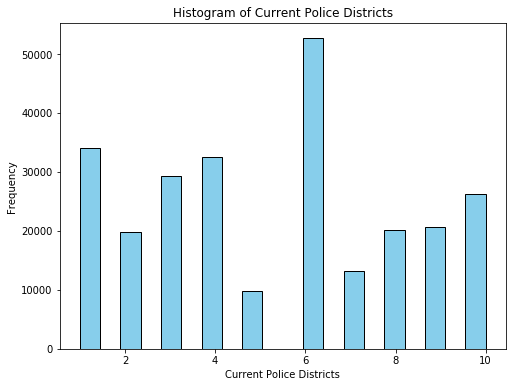

column:  Current Supervisor Districts


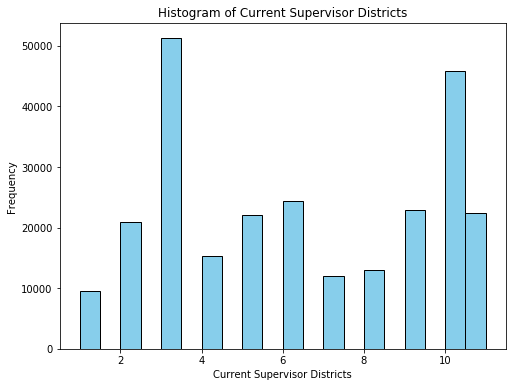

column:  Analysis Neighborhoods


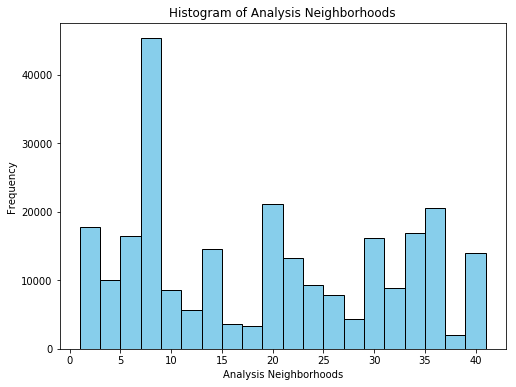

column:  Neighborhoods


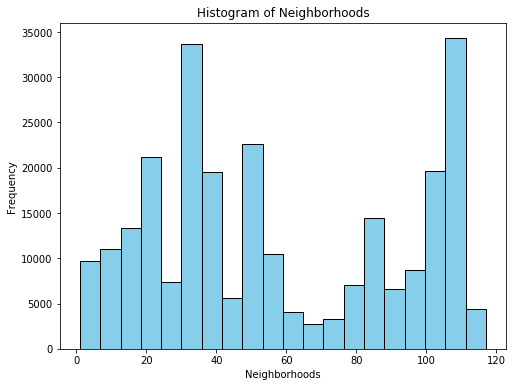

In [16]:
# Histograms:
# Plot histograms for each numeric column
for column in numeric_columns:
    print("column: ", column)
    plt.figure(figsize=(8, 6))
    plt.hist(df[column].dropna().values, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()



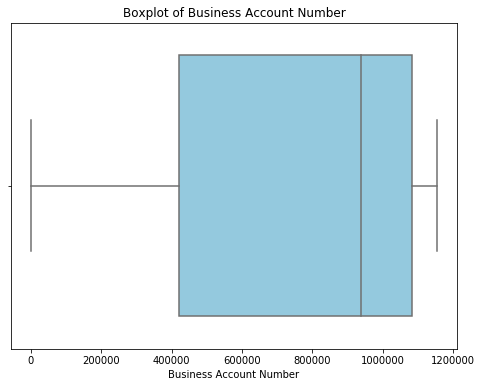

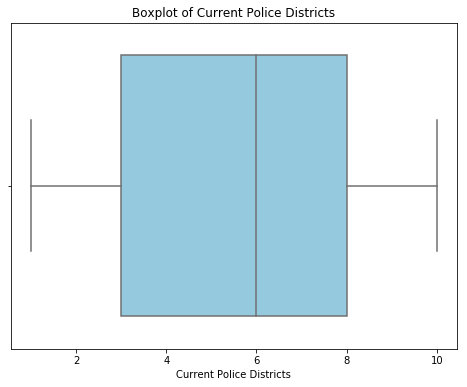

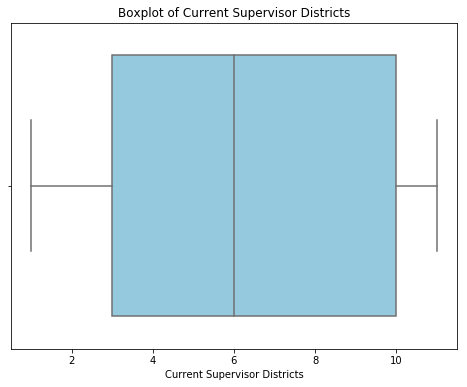

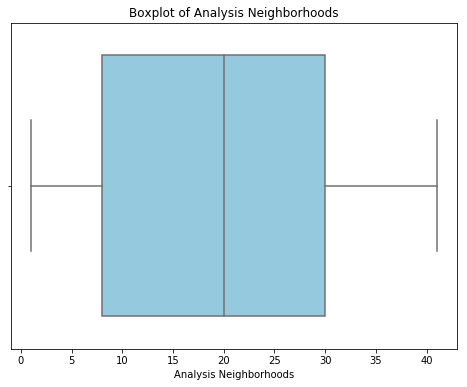

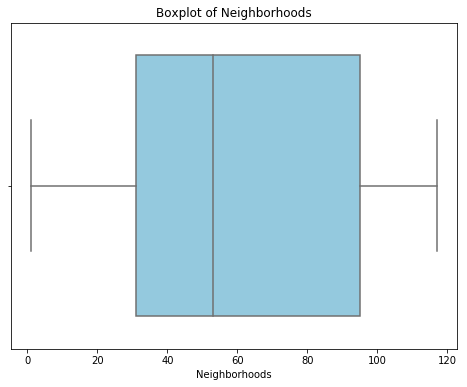

In [17]:
# Box plot

# Plot box Plots for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column].dropna().values, color='skyblue')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

column:  Business Start Date


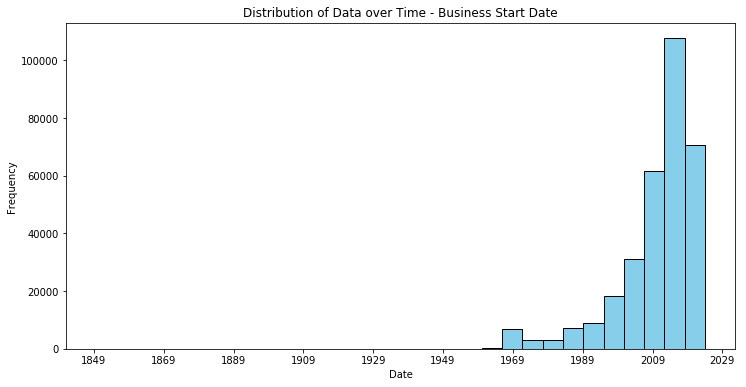

column:  Business End Date


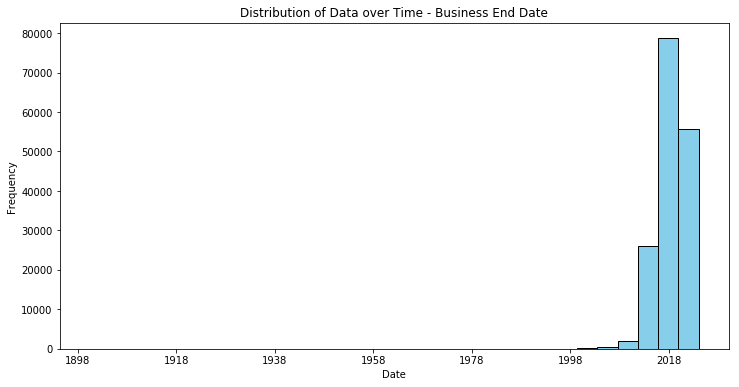

column:  Location Start Date


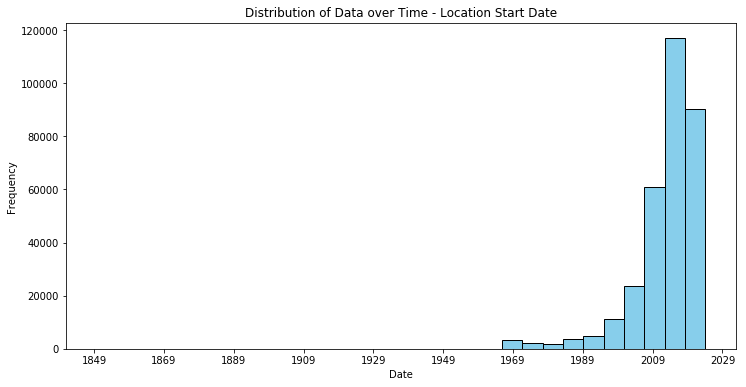

column:  Location End Date


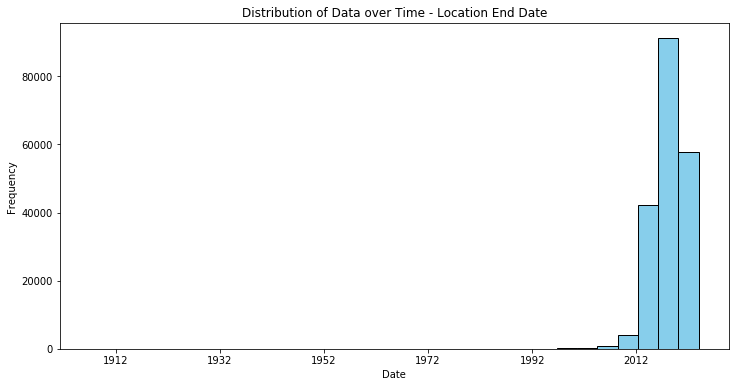

In [18]:
# Specify the columns to convert to datetime
columns_to_datetime = ['Business Start Date', 'Business End Date', 'Location Start Date', 'Location End Date']

# Plot histograms for each datetime column
for column in columns_to_datetime:
    print("column: ", column)
    plt.figure(figsize=(12, 6))
    plt.hist(df[column].dropna().values, bins=30, color='skyblue', edgecolor='black')
    
    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Data over Time - {column}')
    
    plt.show()


,Business Account Number,Source Zipcode,Mail Zipcode,Parking Tax,Transient Occupancy Tax,Supervisor District,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Neighborhoods
Business Account Number,1.000000,-0.034493,0.030447,-0.019288,0.081019,0.059553,-0.008906,-0.012864,0.024767,0.020772,-0.008906
Source Zipcode,-0.034493,1.000000,0.486306,0.005866,0.013998,0.000114,-0.001172,0.006165,0.000063,0.003715,-0.001172
Mail Zipcode,0.030447,0.486306,1.000000,0.004196,0.032670,0.063000,-0.061451,0.047736,-0.010177,0.094149,-0.061451
Parking Tax,-0.019288,0.005866,0.004196,1.000000,0.015843,-0.018079,-0.000088,-0.014751,0.008190,0.000198,-0.000088
Transient Occupancy Tax,0.081019,0.013998,0.032670,0.015843,1.000000,0.023120,-0.004307,0.034082,-0.013000,0.016608,-0.004307
Supervisor District,0.059553,0.000114,0.063000,-0.018079,0.023120,1.000000,0.182414,-0.202752,0.105180,-0.146133,0.182414
SF Find Neighborhoods,-0.008906,-0.001172,-0.061451,-0.000088,-0.004307,0.182414,1.000000,0.064759,-0.172892,-0.178449,1.000000
Current Police Districts,-0.012864,0.006165,0.047736,-0.014751,0.034082,-0.202752,0.064759,1.000000,-0.336181,0.178853,0.064759
Current Supervisor Districts,0.024767,0.000063,-0.010177,0.008190,-0.013000,0.105180,-0.172892,-0.336181,1.000000,0.139821,-0.172892
Analysis Neighborhoods,0.020772,0.003715,0.094149,0.000198,0.016608,-0.146133,-0.178449,0.178853,0.139821,1.000000,-0.178449


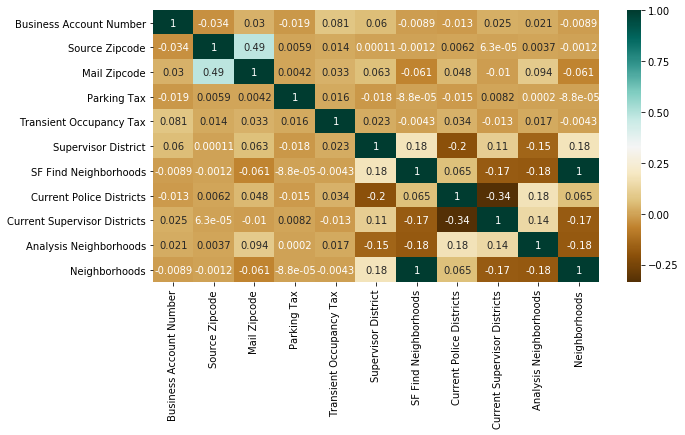

In [19]:
# Plot correlations between features:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

   State  UniqueID
0     AB         2
1     AK        13
2     AL        35
3     AR        36
4     AZ       264
5     BC         3
6     CO       323
7     CT       135
8     DC       128
9     DE        43
10    FL       511
11    FM         1
12    GA       321
13    HI        23
14    IA        32
15    ID        27
16    IL       469
17    IN       104
18    KS        54
19    KY        41
20    LA        35
21    MA       417
22    MB         2
23    MD       215
24    ME        18
25    MI       153
26    MN       197
27    MO       122
28    MS        10
29    MT        18
30    NC       182
31    ND         4
32    NE        51
33    NH        34
34    NJ       343
35    NM        18
36    NV       220
37    NY      1250
38    OH       215
39    OK        39
40    ON        15
41    OR       247
42    PA       369
43    PR         1
44    QC         3
45    RI        28
46    SC        50
47    SD         7
48    TN       117
49    TX       643
50    UT       157
51    VA    

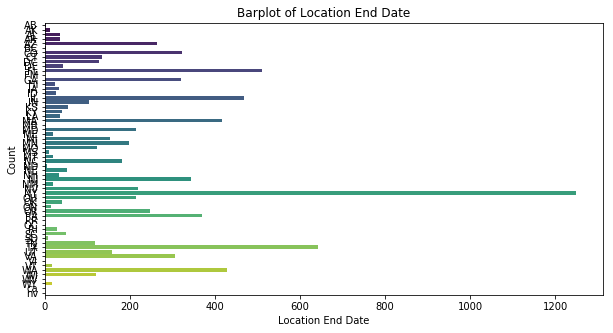

In [48]:
# Plot barplots of the City # Plot barplots of the City and State of the registered business (Different than California)

# Group the dataset by specified columns and count occurrences
grouped_df = df[df['State']!='CA'].groupby('State')['UniqueID'].count().reset_index()

print(grouped_df)
 
# Plot barplot
plt.figure(figsize=(10, 5))
sns.barplot(y='State', x = 'UniqueID', data=grouped_df, palette='viridis')
plt.title(f'Barplot of {column}')
plt.xlabel(column)
plt.ylabel('Count')
plt.show()


### SAmple the Dataset

In [14]:
# Select only from the business located in CA
sampled_df = df[df['State']=='CA']

# Randomly sample 10000 rows
sampled_df = sampled_df.sample(n=10000, random_state=42)  # Use a fixed random_state for reproducibility

sampled_df.shape

(10000, 29)

In [64]:
# Group the dataset by specified columns and count occurrences different than San Francisco
grouped_df = sampled_df[sampled_df['City']!='San Francisco']['City'].value_counts().head(20)
print(grouped_df)

Index(['Oakland', 'Daly City', 'San Jose', 'Richmond', 'Hayward',
       'South San Francisco', 'Berkeley', 'Sacramento', 'San Rafael',
       'Concord', 'S San Fran', 'San Leandro', 'San Mateo', 'Pacifica',
       'Santa Clara', 'Redwood City', 'Los Angeles', 'San Bruno', 'Novato',
       'Santa Rosa'],
      dtype='object')


Oakland                142
Daly City              102
San Jose                51
Richmond                43
Hayward                 40
South San Francisco     39
Berkeley                36
Sacramento              34
San Rafael              34
Concord                 34
S San Fran              27
San Leandro             26
San Mateo               25
Pacifica                24
Santa Clara             22
Redwood City            21
Los Angeles             20
San Bruno               20
Novato                  19
Santa Rosa              17
Name: City, dtype: int64


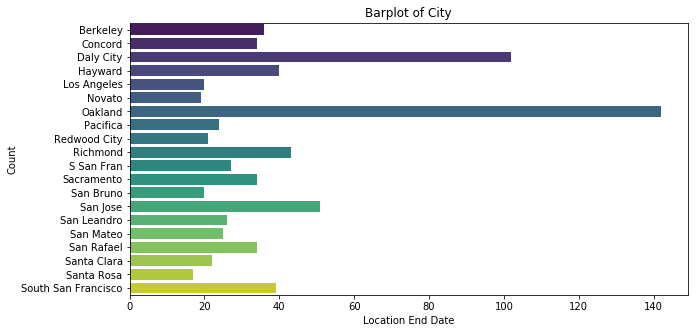

In [66]:
# Group the dataset by specified columns and count occurrences different than San Francisco
grouped_df = sampled_df[sampled_df['City']!='San Francisco']['City'].value_counts().head(20)
print(grouped_df)

filtered_df = sampled_df[sampled_df['City'].isin(grouped_df.index)]

grouped_df = filtered_df.groupby('City')['UniqueID'].size().reset_index()

# Plot barplot
plt.figure(figsize=(10, 5))
sns.barplot(y='City', x = 'UniqueID', data=grouped_df, palette='viridis')
plt.title(f'Barplot of City')
plt.xlabel(column)
plt.ylabel('Count')
plt.show()

                              NAICS Code Description  UniqueID
0                                     Accommodations       296
1                Administrative and Support Services       150
2                Arts, Entertainment, and Recreation       326
3                                   Certain Services       145
4                                       Construction       623
5                                 Financial Services       154
6                                      Food Services       505
7                                        Information       176
8                                          Insurance        31
9                                      Manufacturing        76
10                                          Multiple       139
11             Private Education and Health Services       305
12  Professional, Scientific, and Technical Services       815
13       Real Estate and Rental and Leasing Services       823
14                                      Retail Trade   

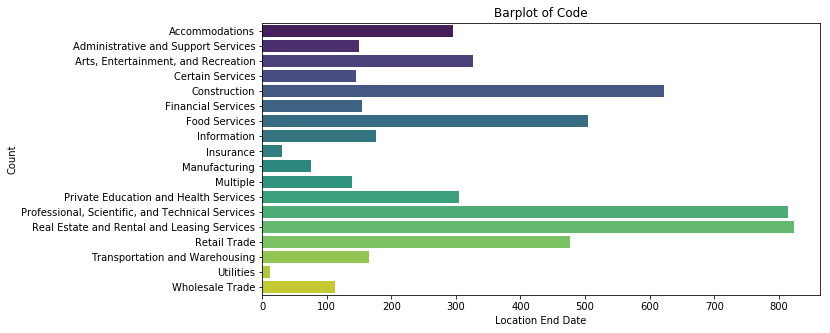

In [67]:
# Group the dataset by specified columns and count occurrences
grouped_df = sampled_df.groupby("NAICS Code Description")['UniqueID'].count().reset_index()

print(grouped_df)
 
# Plot barplot
plt.figure(figsize=(10, 5))
sns.barplot(y='NAICS Code Description', x = 'UniqueID', data=grouped_df, palette='viridis')
plt.title(f'Barplot of Code')
plt.xlabel(column)
plt.ylabel('Count')
plt.show()


   Neighborhoods - Analysis Boundaries  UniqueID
0                Bayview Hunters Point       382
1                       Bernal Heights       160
2                  Castro/Upper Market       257
3                            Chinatown       284
4                            Excelsior       143
5       Financial District/South Beach      1297
6                            Glen Park        45
7                     Golden Gate Park         5
8                       Haight Ashbury       144
9                         Hayes Valley       237
10                      Inner Richmond       202
11                        Inner Sunset       187
12                           Japantown        52
13                           Lakeshore        66
14                        Lincoln Park         5
15                   Lone Mountain/USF       101
16                              Marina       295
17                             Mission       608
18                         Mission Bay       158
19                  

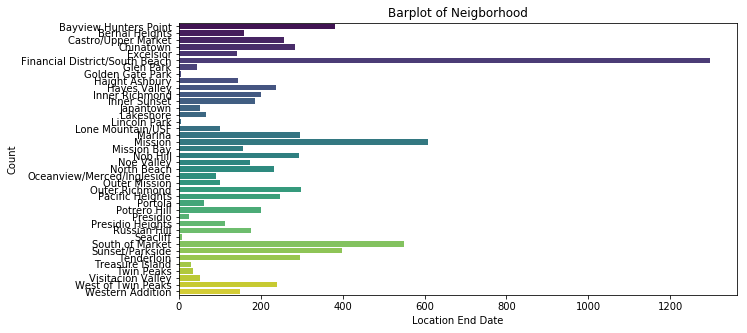

In [68]:
# Group the dataset by specified columns and count occurrences
grouped_df = sampled_df.groupby("Neighborhoods - Analysis Boundaries")['UniqueID'].count().reset_index()

print(grouped_df)
 
# Plot barplot
plt.figure(figsize=(10, 5))
sns.barplot(y='Neighborhoods - Analysis Boundaries', x = 'UniqueID', data=grouped_df, palette='viridis')
plt.title(f'Barplot of Neigborhood')
plt.xlabel(column)
plt.ylabel('Count')
plt.show()

In [21]:
sampled_df.columns


Index(['Location Id', 'Business Account Number', 'Ownership Name', 'DBA Name',
       'Street Address', 'City', 'State', 'Source Zipcode',
       'Business Start Date', 'Business End Date', 'Location Start Date',
       'Location End Date', 'Mail Address', 'Mail City', 'Mail Zipcode',
       'Mail State', 'NAICS Code', 'NAICS Code Description', 'Parking Tax',
       'Transient Occupancy Tax', 'Supervisor District',
       'Neighborhoods - Analysis Boundaries', 'Business Location', 'UniqueID',
       'SF Find Neighborhoods', 'Current Police Districts',
       'Current Supervisor Districts', 'Analysis Neighborhoods',
       'Neighborhoods'],
      dtype='object')

In [15]:
# Specify the categorical columns
categorical_columns = ['City', 'State', 'UniqueID', 'Neighborhoods', 'NAICS Code Description', 'Neighborhoods - Analysis Boundaries']

grouping_columns = [['Business Account Number', 'Current Police Districts',
       'Current Supervisor Districts', 'Analysis Neighborhoods', 'City', 'State'
       'Neighborhoods', 'Neighborhoods - Analysis Boundaries', 'NAICS Code Description']]


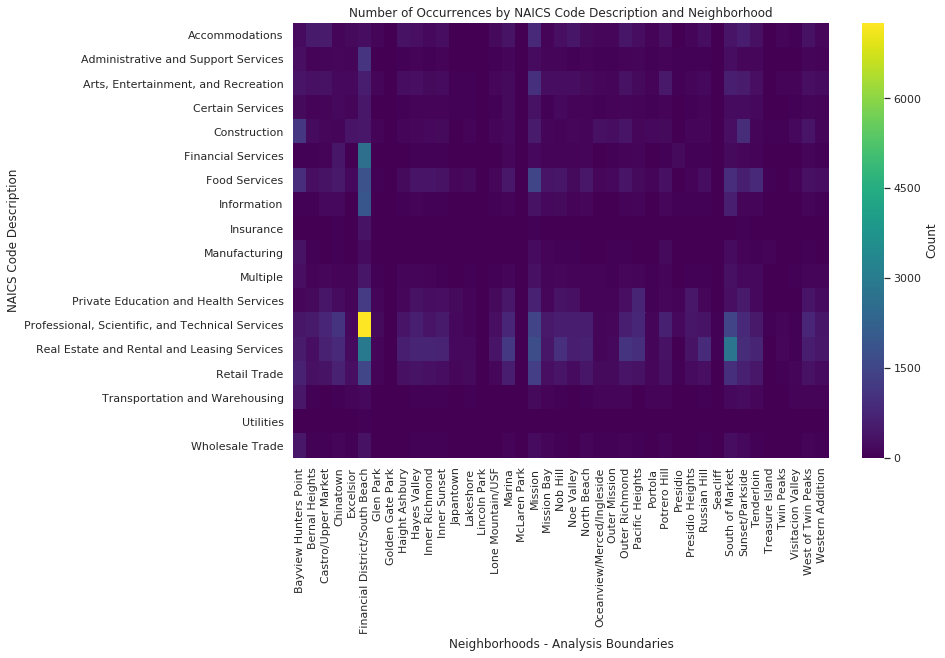

In [25]:
# A heatmap for the number of occurrences of neighborhoods and codes
heatmap_data = pd.crosstab(df['NAICS Code Description'], df['Neighborhoods - Analysis Boundaries'])

# Set up the plot
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=False, fmt='d', cmap='viridis', cbar_kws={'label': 'Count'})

# Set labels and title
plt.xlabel('Neighborhoods - Analysis Boundaries')
plt.ylabel('NAICS Code Description')
plt.title('Number of Occurrences by NAICS Code Description and Neighborhood')

# Show the plot
plt.show()

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


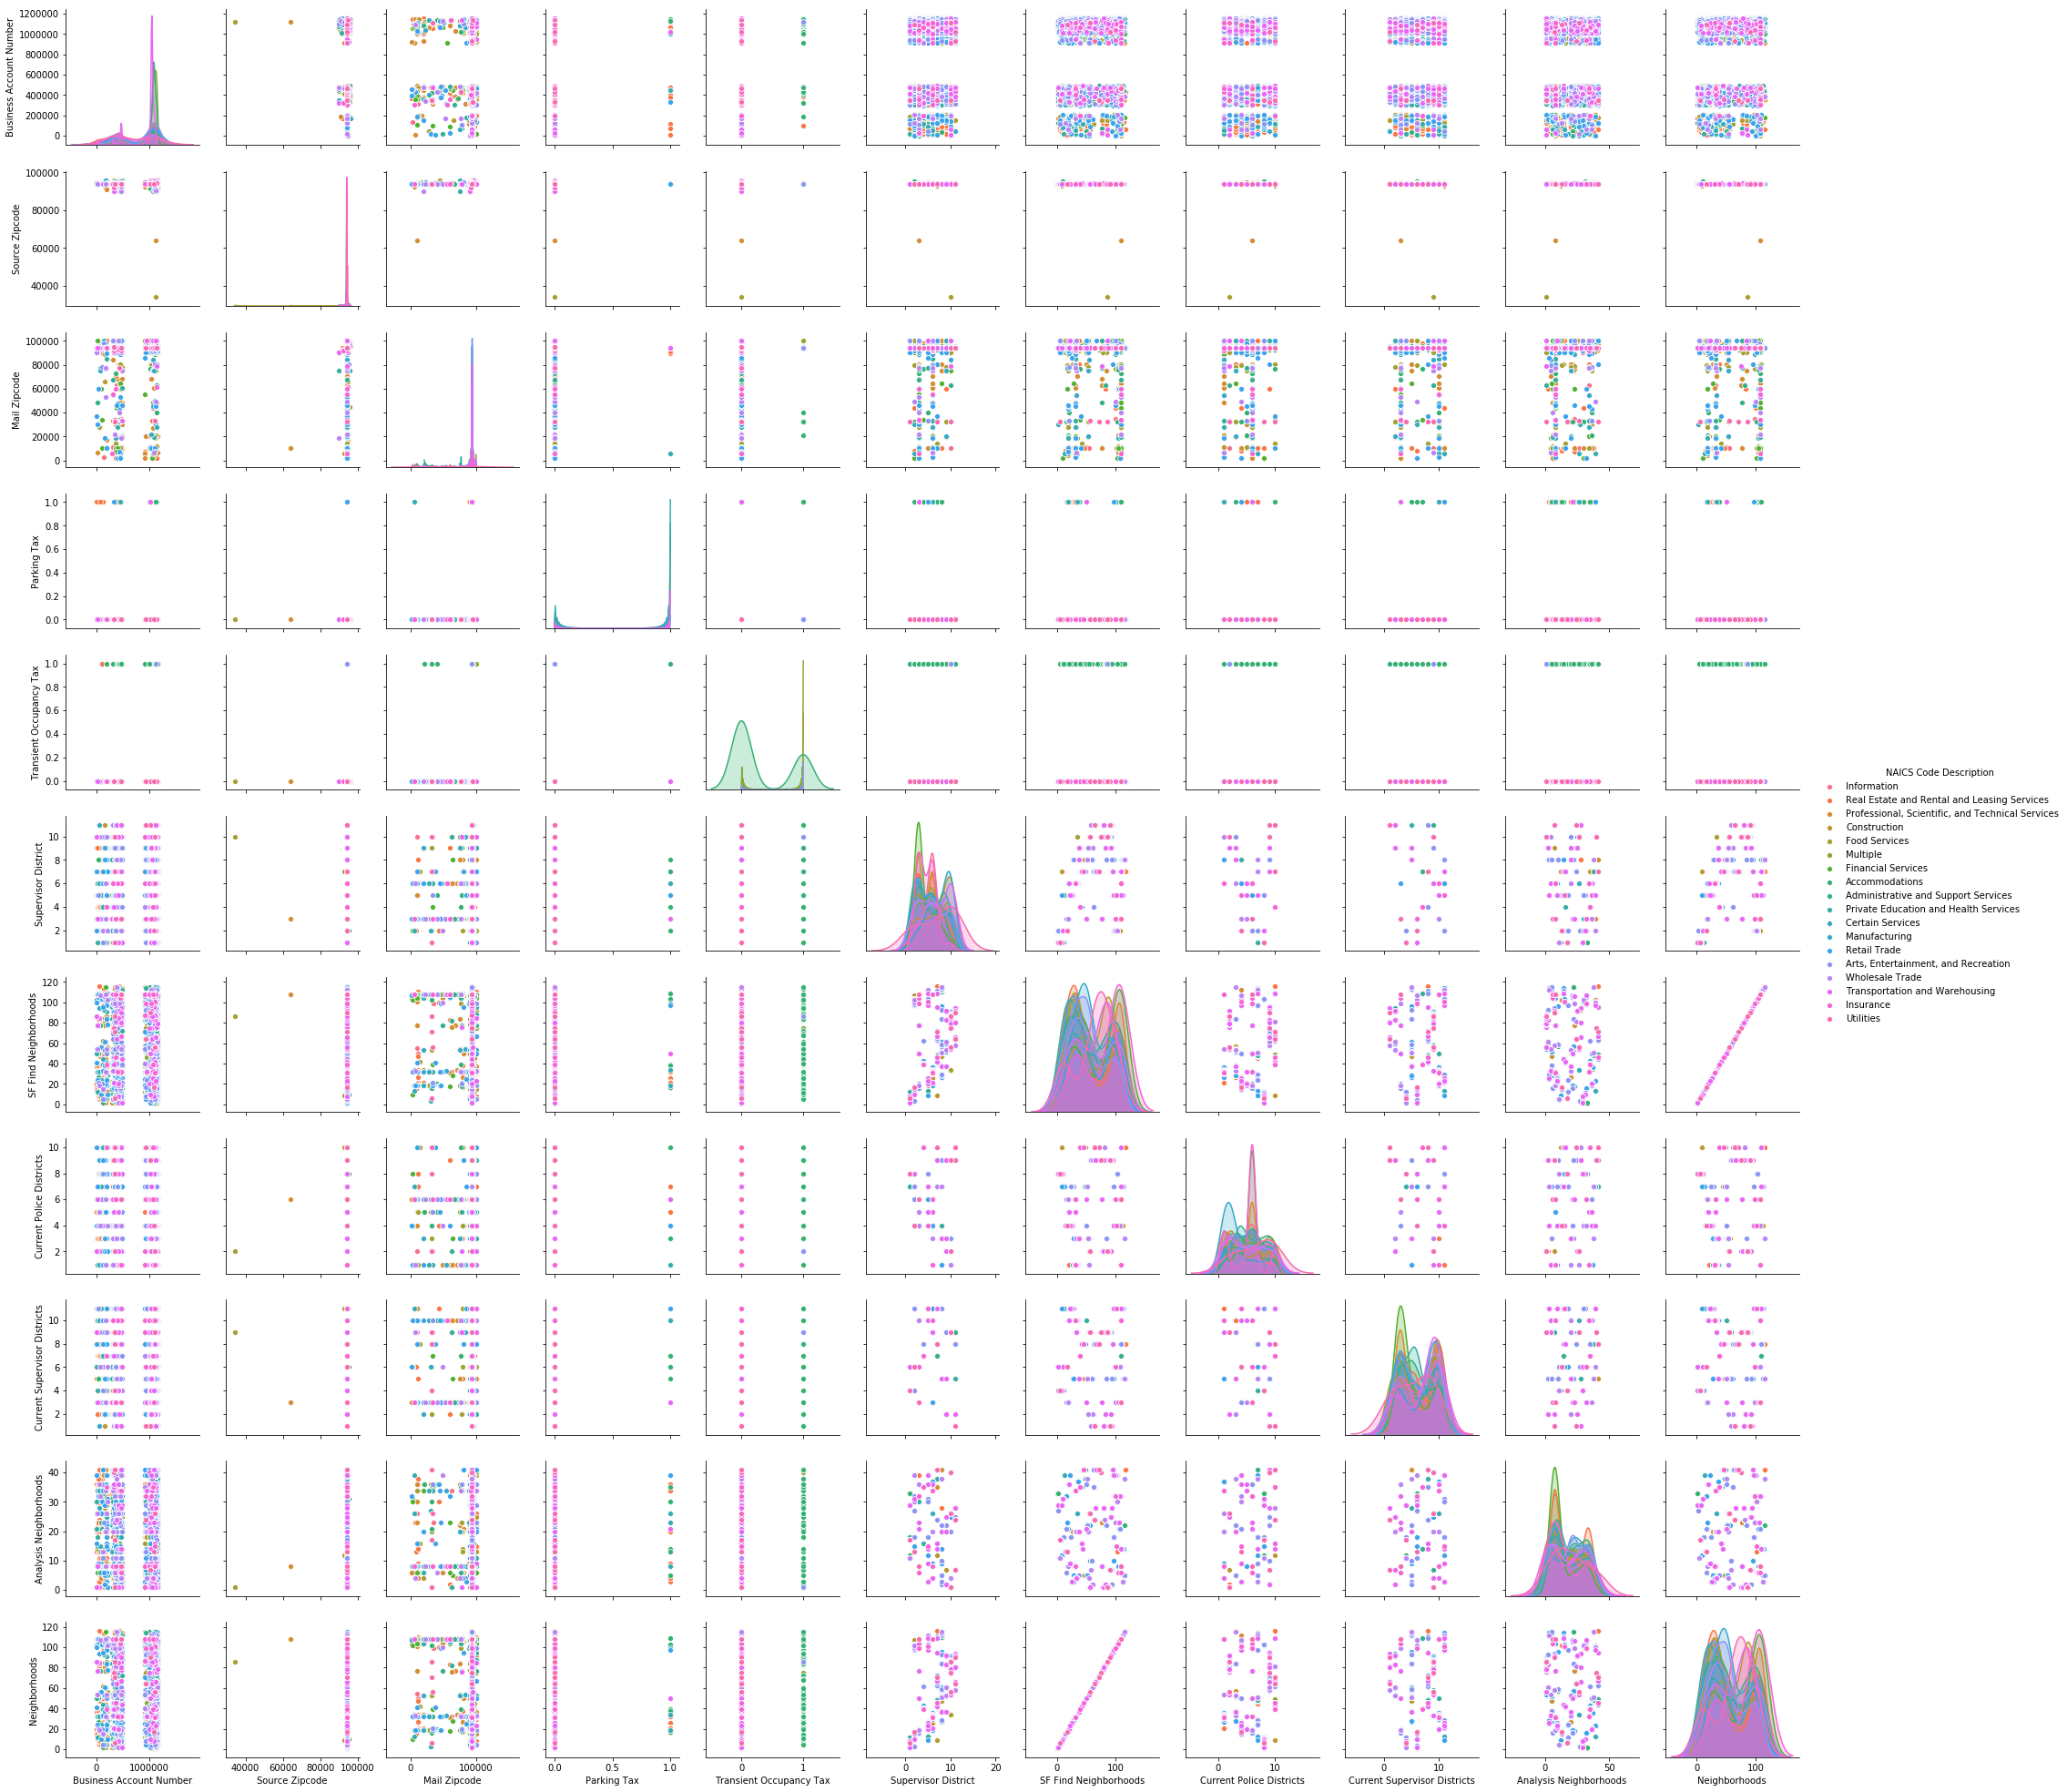

In [46]:
# Create a Pairplot

sns.pairplot(sampled_df, hue='NAICS Code Description');

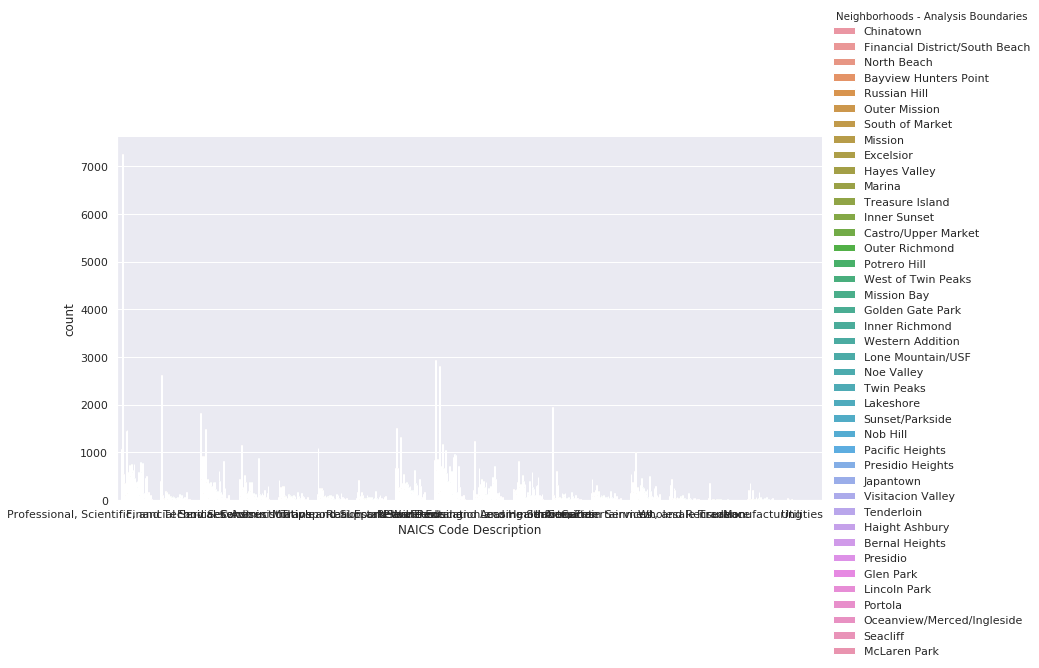

In [22]:
# Create a pair plot for categorical columns
sns.set(style="darkgrid")
sns.catplot(x='NAICS Code Description', hue='Neighborhoods - Analysis Boundaries', kind='count', data=df, height=6, aspect=2)
plt.show()


## Plot a Folium Map

of the distribution of business over the area, having the zipcodes as reference.

In [ ]:
# Use geopy to obtain latitude and longitude for each zip code
geolocator = Nominatim(user_agent="geo_locator")

# Define a function to get latitude and longitude for a given zip code
def get_lat_long(zipcode):
    location = geolocator.geocode(zipcode)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Create new columns for Latitude and Longitude
sampled_df['Latitude'] = None
sampled_df['Longitude'] = None

# Iterate over rows and update Latitude and Longitude
for index, row in sampled_df.iterrows():
    zipcode = row['Source Zipcode']
    latitude, longitude = get_lat_long(zipcode)
    
    # Update the DataFrame with obtained coordinates
    sampled_df.at[index, 'Latitude'] = latitude
    sampled_df.at[index, 'Longitude'] = longitude

# Drop rows with missing Latitude or Longitude
sampled_df = sampled_df.dropna(subset=['Latitude', 'Longitude'])

In [ ]:
# Create a Folium map centered at the mean coordinates
m = folium.Map(location=[sampled_df['Latitude'].mean(), sampled_df['Longitude'].mean()], zoom_start=12)

# Add markers for each record
for index, row in sampled_df.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']],
                  popup=f"{row['Ownership Name']} - {row['Street Address']}",
                  icon=folium.Icon(color='blue')).add_to(m)

# Save the map to an HTML file
m.save('business_distribution_map.html')

## Conclussions



For the purposes of this test, I will not elaborate too much into the analysis of the dataset and insights. 

With the different visualizations, plots and tables that I have included in this notebook, it is possible to figure out many characteristics of the dataset. 

Further Analysis:
Depending on the analysis goals, It is possible to conduct statistical tests, build predictive models, or create more advanced visualizations.

Communication:
There are two main ways to communicate these analysis: 

- by a notebook, like in this case.

- by a visualization dashboard, wich has the benefits of being more interactive and easy to understand.



